<a href="https://colab.research.google.com/github/arinasalsabila/ARINA-SALSABILA-1101170504/blob/main/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

 3scene@                             daun/           'Tugas '
'arina salsabila.ipynb'              hutan.jpg
'Copy of scenes_nn_4 layers.ipynb'   nnmodel_scene/


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [10]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [12]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [13]:
print(labels)

['Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1'

In [14]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [15]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [16]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(437, 64, 64, 3)
(146, 64, 64, 3)


In [18]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

In [19]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [20]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 80ms/step - loss: 1.6026 - accuracy: 0.2723 - val_loss: 1.5272 - val_accuracy: 0.3562
Epoch 2/25
14/14 [==============================] - 1s 67ms/step - loss: 1.4010 - accuracy: 0.4714 - val_loss: 1.2688 - val_accuracy: 0.5137
Epoch 3/25
14/14 [==============================] - 1s 66ms/step - loss: 1.1610 - accuracy: 0.5789 - val_loss: 1.1913 - val_accuracy: 0.5753
Epoch 4/25
14/14 [==============================] - 1s 68ms/step - loss: 1.0187 - accuracy: 0.6110 - val_loss: 1.1873 - val_accuracy: 0.5137
Epoch 5/25
14/14 [==============================] - 1s 67ms/step - loss: 0.9691 - accuracy: 0.6430 - val_loss: 1.0091 - val_accuracy: 0.6027
Epoch 6/25
14/14 [==============================] - 1s 67ms/step - loss: 0.8528 - accuracy: 0.7094 - val_loss: 1.0057 - val_accuracy: 0.5616
Epoch 7/25
14/14 [==============================] - 1s 67ms/step - loss: 0.8319 - accuracy: 0.6865 - val_loss: 0.9451 - val_accuracy: 0.6164
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


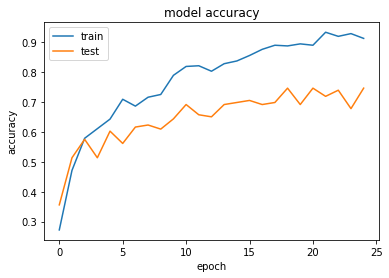

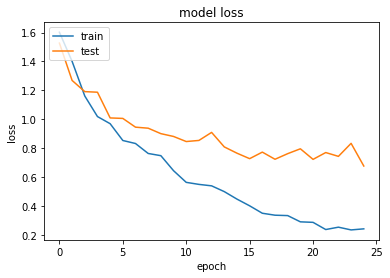

In [22]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

     Class 1       0.76      0.81      0.79        27
     Class 2       0.83      0.76      0.79        25
     Class 3       0.74      0.76      0.75        33
     Class 4       0.69      0.71      0.70        31
     Class 5       0.75      0.70      0.72        30

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



In [25]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [26]:
import cv2
import matplotlib.pyplot as plt
image1='gambardaun.jpg'

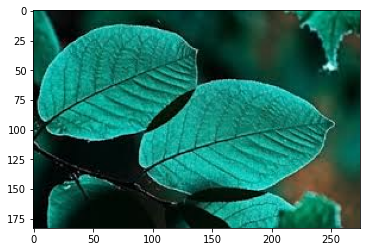

In [27]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [29]:
image_testing = Image.open('gambardaun.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [30]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [32]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[6.2170490e-03 3.1052218e-06 9.2854161e-06 9.8944283e-01 4.3277652e-03]]
['Class 4']
